In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ", x_train.shape[0])
print("Size of each image in dataset = ", x_train.shape[1:])
print("No. of test examples = ", x_test.shape[0])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 4       1       4       3       4       

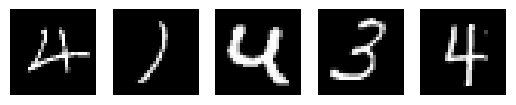

In [3]:
n = 5
index = np.random.choice(x_train.shape[0], 5)
print("label: ", end="")

for i, ind in enumerate(index):
    plt.subplot(1, n, i+1)
    plt.imshow(x_train[ind], cmap="gray")
    plt.axis("off")
    print(y_train[ind], end="       ")

plt.show()

In [4]:
x_train_flatten = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test_flatten = x_test.reshape(-1, 28*28).astype("float32") / 255.0
n_validation = 10000
x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]

In [5]:
model = keras.models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
keras.utils.plot_model(model, show_shapes=True)
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
n_epochs = 10
batch_size = 512

history = model.fit(
    x_train_flatten, y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(x_validation, y_validation)
)
results = model.evaluate(x_test_flatten, y_test)
print("Loss = ", results[0])
print("Accuracy = ", results[1] * 100, "%")


You must install pydot (`pip install pydot`) for `plot_model` to work.


C:\Users\Aiklavya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6929 - loss: 1.0949 - val_accuracy: 0.9246 - val_loss: 0.2625
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9336 - loss: 0.2393 - val_accuracy: 0.9469 - val_loss: 0.1870
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9525 - loss: 0.1657 - val_accuracy: 0.9573 - val_loss: 0.1499
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9623 - loss: 0.1317 - val_accuracy: 0.9614 - val_loss: 0.1320
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9692 - loss: 0.1064 - val_accuracy: 0.9653 - val_loss: 0.1181
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9757 - loss: 0.0885 - val_accuracy: 0.9688 - val_loss: 0.1073
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9800 - loss: 0.0728 - val_accuracy: 0.9689 - val_loss: 0.1020
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9830 - loss: 0.0605 - val_accuracy: 0.9717 - va

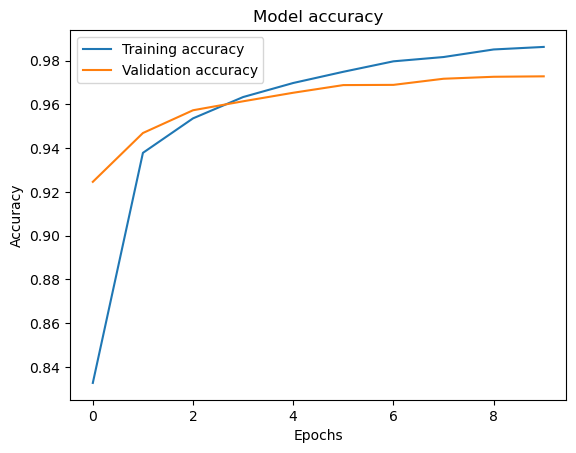

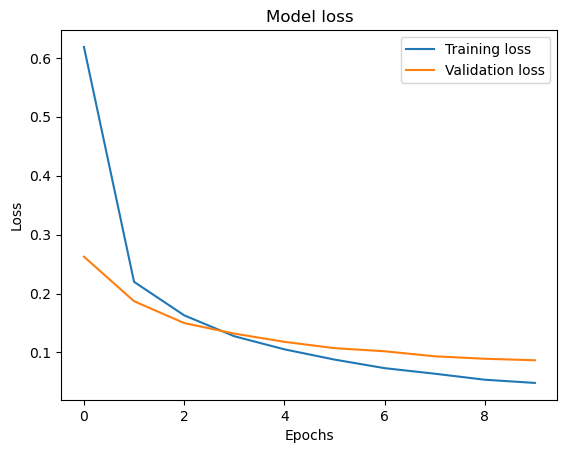

In [6]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Label: 
7       5       6       9       3       

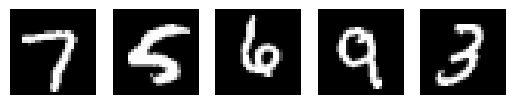

Predicted value: 
7   5   6   9   3   

In [7]:
n = 5
index = np.random.choice(x_test.shape[0], n)
print("Label: ")

for i, ind in enumerate(index):
    plt.subplot(1, n, i+1)
    plt.imshow(x_test[ind], cmap="gray")
    plt.axis("off")
    print(y_test[ind], end="       ")

plt.show()

print("Predicted value: ")
for i, ind in enumerate(index):
    img = x_test_flatten[ind].reshape(1, 784)
    prediction = model.predict(img, verbose=0)
    digit = np.argmax(prediction)
    print(digit, end="   ")